In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [12]:
df = pd.read_csv('../data/wine_clustering_data.csv')
df.head()

,alcohol,malic_acid,ash,ash_alcanity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [13]:
df.shape

(178, 13)

In [14]:
df.describe()

,alcohol,malic_acid,ash,ash_alcanity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


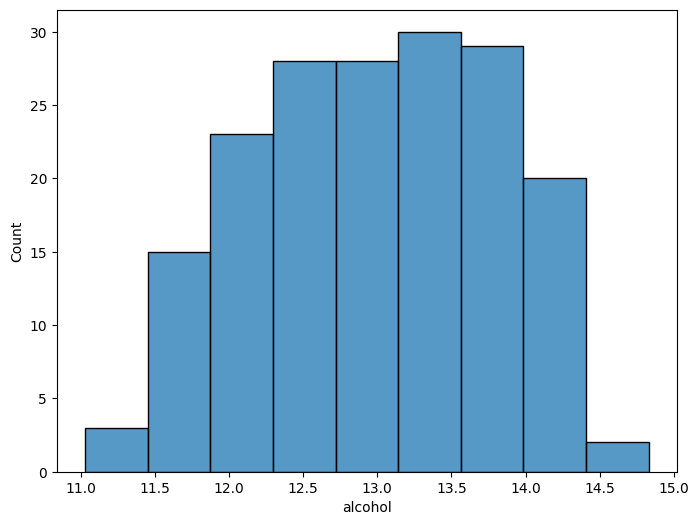

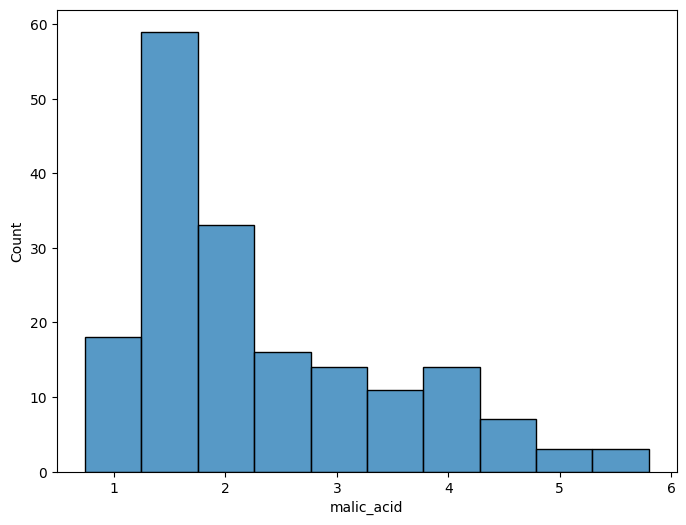

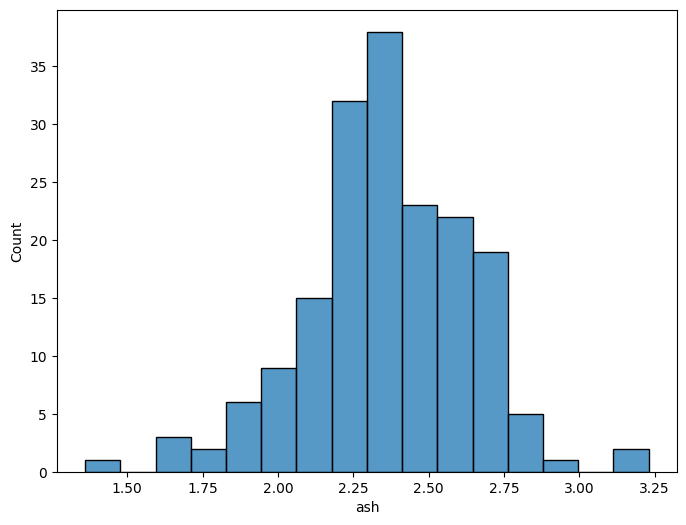

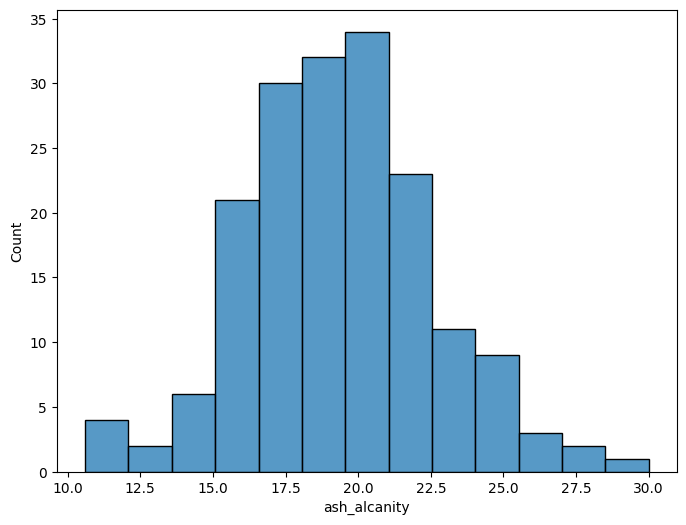

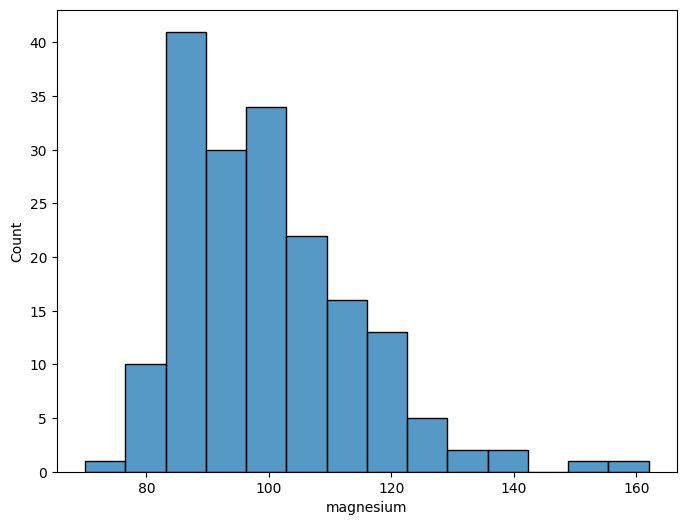

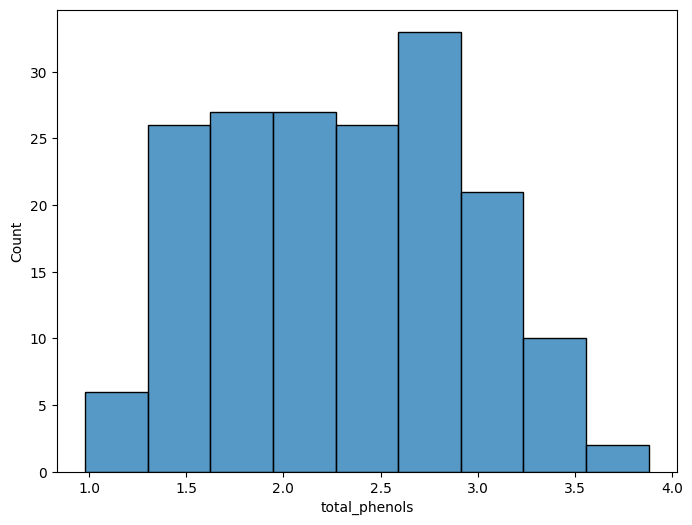

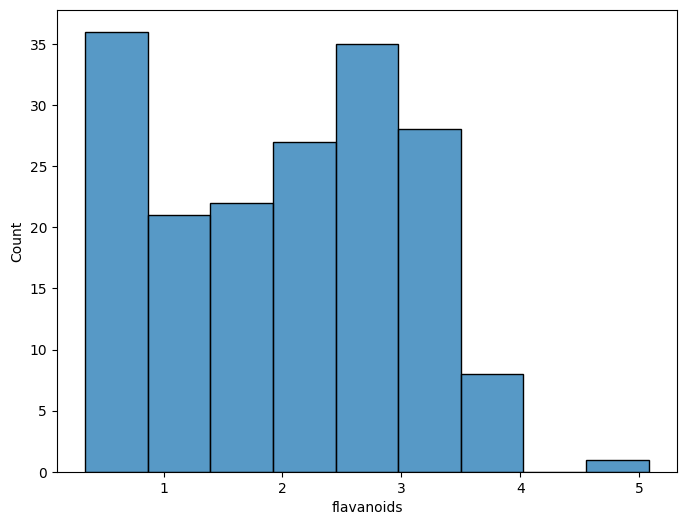

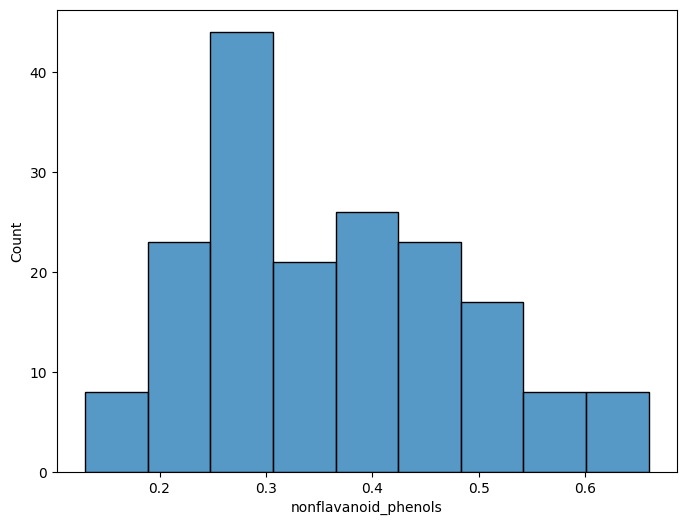

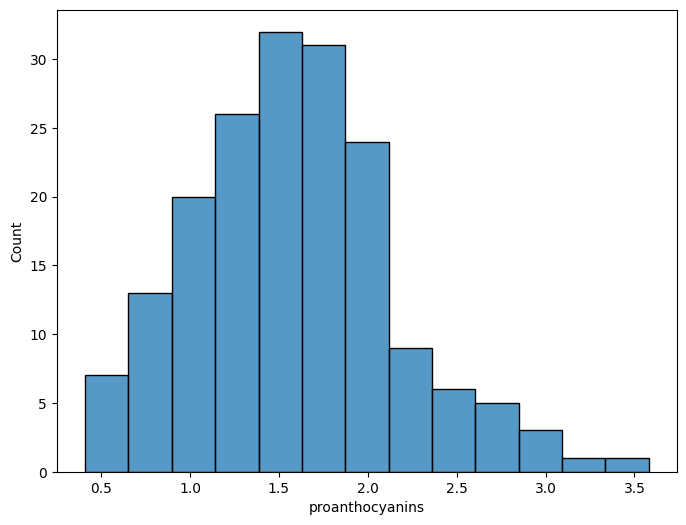

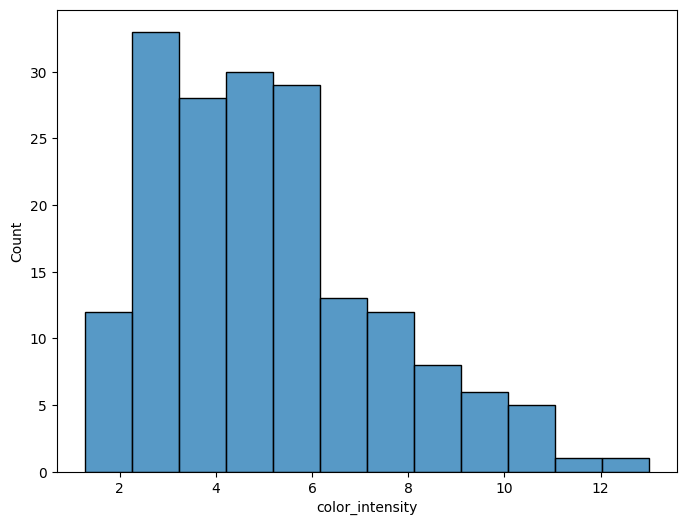

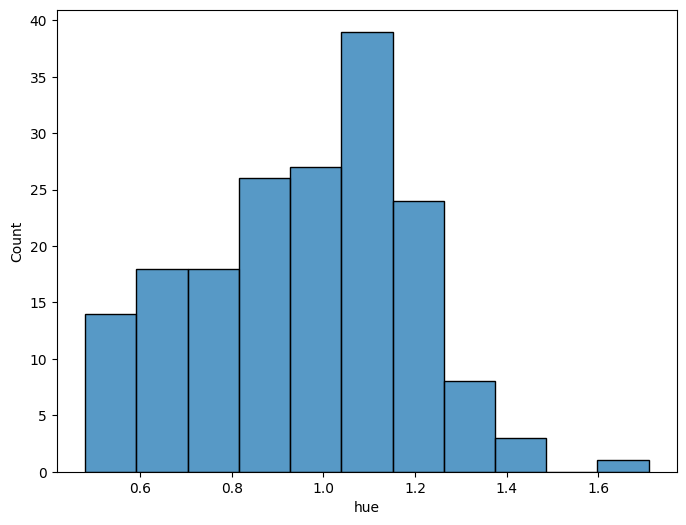

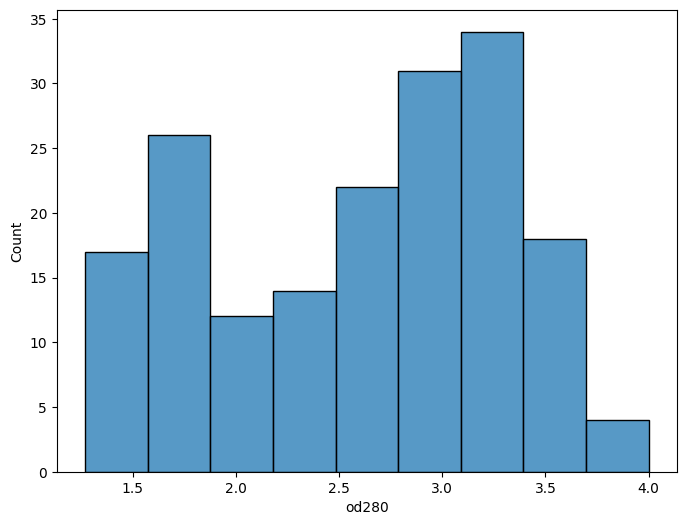

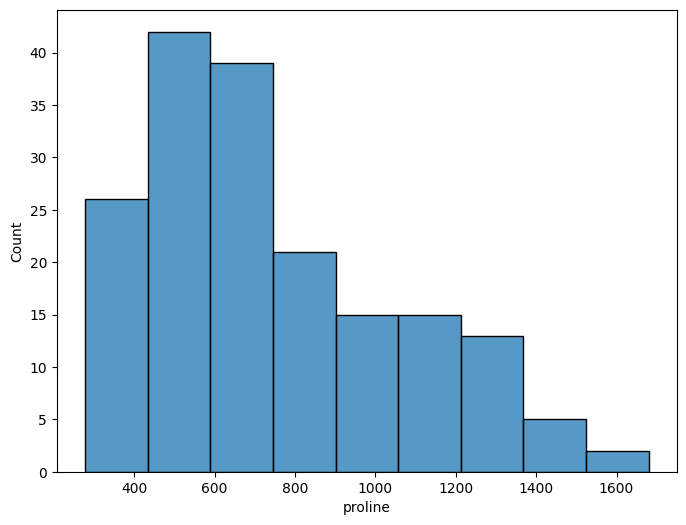

In [15]:
for i in df.columns:
    plt.figure(figsize=(8,6))
    sns.histplot(df[i])

In [17]:
scale  = StandardScaler()

df_scale = scale.fit_transform(df)
df_scale = pd.DataFrame(df_scale,columns=df.columns)
df_scale.head()

,alcohol,malic_acid,ash,ash_alcanity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [18]:
model = DBSCAN(eps=2,min_samples=2)
model.fit(df_scale)
model.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  0, -1, -1,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1,  2, -1, -1, -1,  0,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0, -1,  3,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1,  0,  2, -1, -1,  0,
        0,  0,  0, -1,  0,  0,  0,  3, -1,  0, -1,  0,  0, -1,  0,  0, -1,
       -1,  0, -1, -1, -1, -1,  0,  0, -1,  0, -1, -1,  4,  4,  4,  5,  5,
       -1, -1,  5,  6,  6, -1,  6,  5, -1,  4, -1,  5,  5,  7,  7,  7, -1,
        5,  5,  5,  5, -1,  8,  8,  5,  6,  6,  4,  5,  5,  5,  5,  5, -1,
        4,  5,  5,  5,  5,  7,  7, -1])

<Axes: xlabel='alcohol', ylabel='malic_acid'>

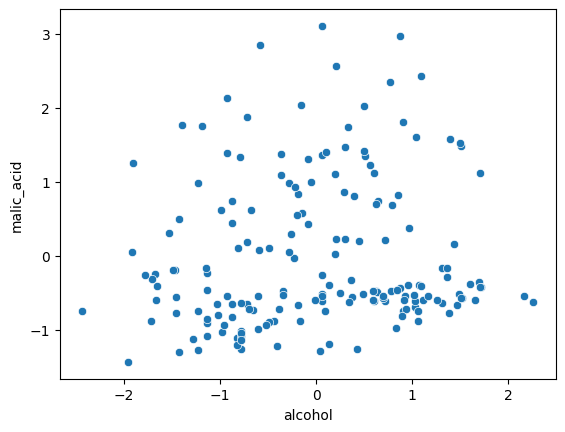

In [19]:
sns.scatterplot(df_scale,x='alcohol',y='malic_acid')

<Axes: xlabel='alcohol', ylabel='malic_acid'>

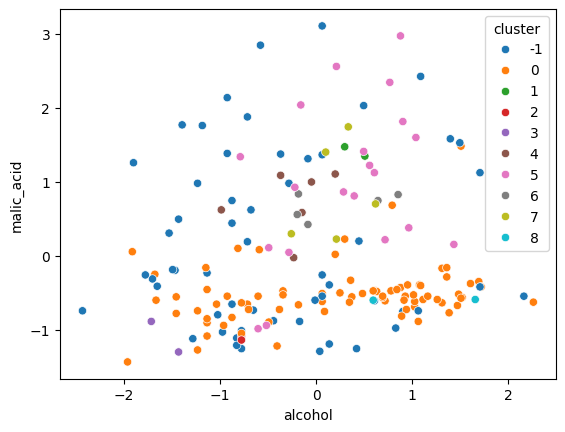

In [20]:
df_scale['cluster'] = model.labels_

sns.scatterplot(df_scale,x='alcohol',y='malic_acid',hue='cluster',palette='tab10')